In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [4]:
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

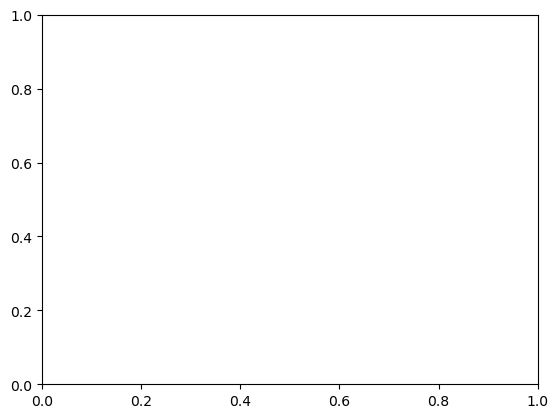

In [5]:
fig ,ax=plt.subplots()

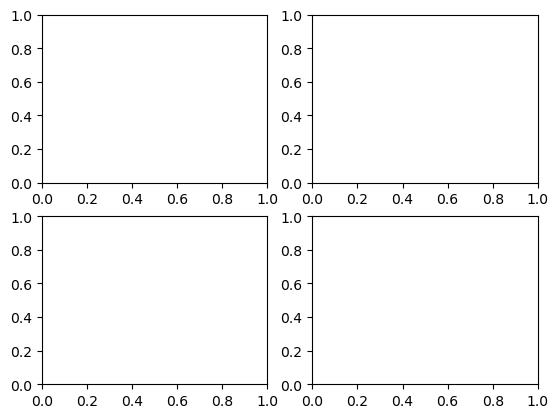

In [6]:
fig ,ax=plt.subplots(2,2)

<Axes: xlabel='job_title_short'>

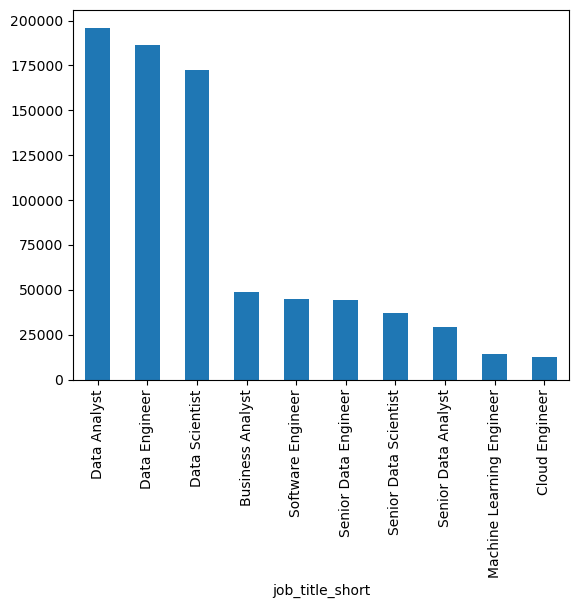

In [7]:
fig ,ax=plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar')


<Axes: xlabel='job_schedule_type'>

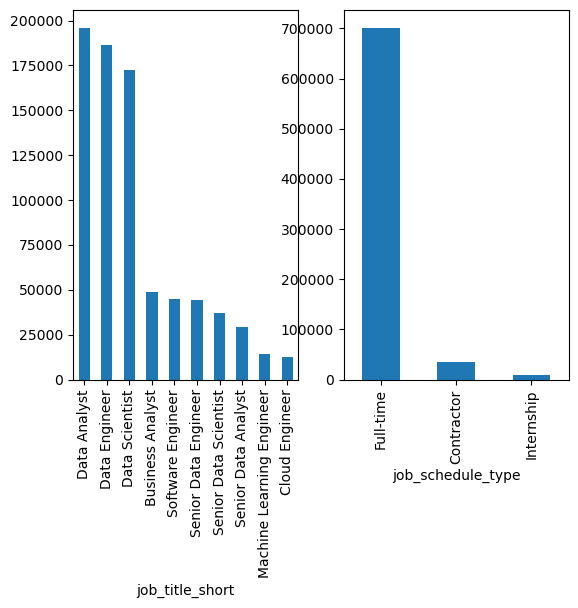

In [8]:
fig ,ax=plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar',ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])

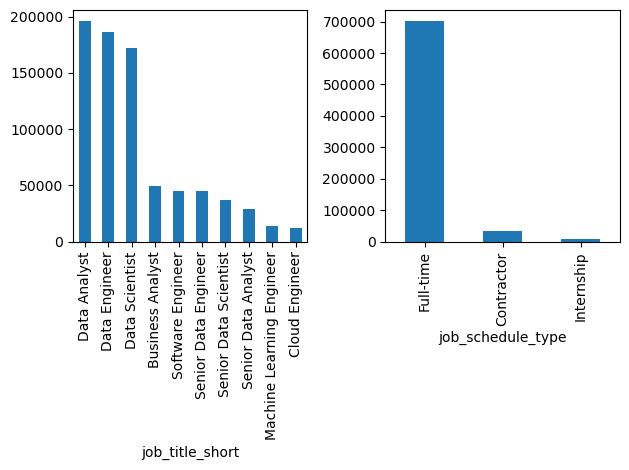

In [9]:
#To fix the overlapping in previous plot,we are using tight layout

fig ,ax=plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar',ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])

fig.tight_layout()

In [13]:
df_skills=df.copy()
df_skills=df_skills.explode('job_skills')
skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
skills_count

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [16]:
df_skills_count=skills_count.reset_index(name='skill_count')
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [17]:
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [29]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [40]:
job_titles=['Data Analyst','Data Engineer','Data Scientist']

0 Data Analyst
1 Data Engineer
2 Data Scientist


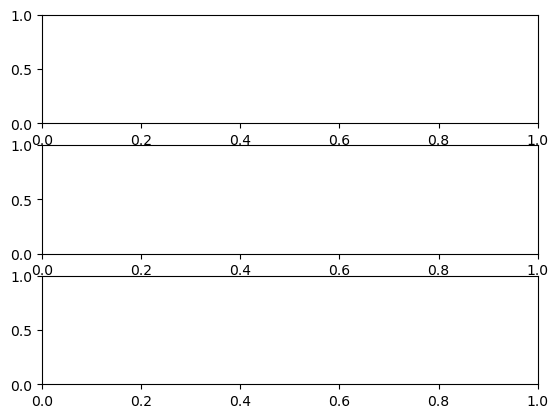

In [35]:
fig , ax = plt.subplots(3,1)

for i,job_titles in enumerate(job_titles):
    print(i,job_titles)

     job_skills job_title_short  skill_count
1821        sql    Data Analyst        92428
558       excel    Data Analyst        66860
1478     python    Data Analyst        57190
1941    tableau    Data Analyst        46455
1410   power bi    Data Analyst        39380
     job_skills job_title_short  skill_count
1822        sql   Data Engineer       113130
1479     python   Data Engineer       108022
141         aws   Data Engineer        62049
151       azure   Data Engineer        60674
1772      spark   Data Engineer        53656
     job_skills job_title_short  skill_count
1480     python  Data Scientist       113711
1823        sql  Data Scientist        78982
1518          r  Data Scientist        59566
1637        sas  Data Scientist        29534
1943    tableau  Data Scientist        29445


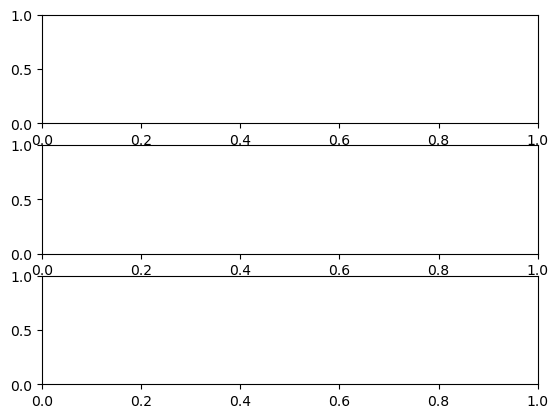

In [38]:
fig , ax = plt.subplots(3,1)

for i, job_titles in enumerate(job_titles):
    print(df_skills_count[df_skills_count['job_title_short'] == job_titles].head(5))

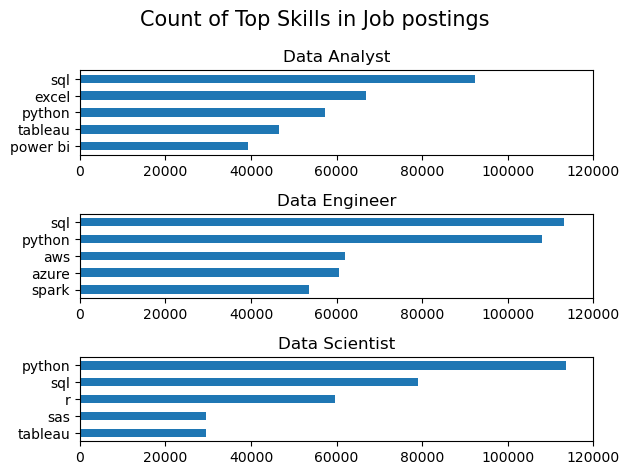

In [43]:
fig , ax = plt.subplots(3,1)

for i,job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)


fig.suptitle('Count of Top Skills in Job postings',fontsize=15)
fig.tight_layout()